<a href="https://colab.research.google.com/github/saruulijile2/storytelling-with-data/blob/master/SquidGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from plotly import express as px

# Project team

The team consists of Akiah Watts (AkiahW) and Saruul (Saruulijile2).

# Background and overview

For this analysis of the TV show Squid Game, we wanted to compare and contrast the reactions of movie critics versus the general audience. We assumed that critics would be more focused on the technical aspects (themes, camera angles, and set/character designs) of Squid Game. On the other hand, we assumed the general audience would be more focused on their responses and feelings to the characters and scenes. To find the potential differences in their reactions, we found a dataset of thousands of reviews on Kaggle and also manually gathered tweet data, as well. Through using sentiment analysis libraries, we calculated the general tendency of the reactions and categorized them into positive, neutral, and negative. Then, we also created word clouds to find the most repeated words in both the critics' review and the general audience's reaction. Through our analysis, we found out that both types of reactions were mostly neutral, but the most common words differed greatly. For example, the critics' reviews used the words "love", "plot", and "good" more often while the general audience used the words "finish" and "good.” These results highlight the difference between how people from different backgrounds would react differently to TV shows. 

# Approach

Start by running the setup (outside libraries required for visualizing the data) and data (the aforementioned tweets). The spreadsheets include the tweets, and human analysis of the valence and category the tweet would fall under. Under the Analysis section, we first cleaned up the dataset of critics reviews and got rid of words that were repeated in all the reviews. Then, we created a bar graph with the ratings of Squid Game reviews. Then, we conducted a sentiment analysis and created a wordcloud that showed the most repeated words in bigger fonts. Then, we moved on to analyzing the reaction of the general audience by calculating the valence of the tweets by using a sentiment analysis tool. Interestingly, the results of the analysis did not match with our manual analysis of the tweets. Moreover, we also created a word cloud for the tweets, which showed the most common words in the reaction of general audience. 

# Quick summary

For the critics review, the sentiment analysis calculated that there are more neutral comments than negative and positive ones. Moroever, the most common words in the reviews that we found interesting were "good", "love", and "plot." As for the general public's reaction, the analysis tool also calculated that there are more tweets of neutral valence. The most repeated words were "good" and "finish."

# Data

Briefly describe your dataset(s), including links to original sources.  Provide any relevant background information specific to your data sources.

In [ ]:
url = 'https://github.com/ContextLab/storytelling-with-data/raw/master/data-stories/squid-games/squidgame_reviews.csv'
reviews = pd.read_csv(url).drop(labels = 'Unnamed: 0', axis =1)

url1 = 'https://raw.githubusercontent.com/AkiahW/storytelling-with-data-1/master/data-stories/squid-games/Squid%20Game%20tweets%20-%20Sheet1%20(1).csv'
tweets = pd.read_csv(url1)

In [ ]:
reviews.head()

,User_name,Review title,Review Rating,Review date,Review_body
0,Leofwine_draca,A new TV classic,10/10,9 October 2021,"Just finished up SQUID GAME, the Korean TV sho..."
1,kosmasp,Just a game,9/10,10 October 2021,"Well multiple games actually, but even that yo..."
2,Tweekums,Games to die for,10/10,11 October 2021,This runaway hit from South Korea is centred o...
3,FeastMode,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021,I went into this show knowing absolutely nothi...
4,Irishchatter,It started off strong but ended disoriented,7/10,8 October 2021,I honestly don't know wtf the main character n...


In [ ]:
tweets.head()

,Date,Search,Tweet,Likes,Shares
0,12-31-21,"""squid"" and ""game"" until:2022-01-01 since:2021...",It feels like we’re at the part of Squid Game ...,36100,3243
1,12-31-21,"""squid"" and ""game"" until:2022-01-01 since:2021...",lola and satbyeol doing a squid game dance,116,22
2,12-31-21,"""squid"" and ""game"" until:2022-01-01 since:2021...",eunji as gihun bomi as deoksu and namjoo as il...,191,45
3,12-30-21,"""squid"" and ""game"" until:2022-01-01 since:2021...",after watching encanto and squid game i'm neve...,62,9
4,12-30-21,"""squid"" and ""game"" until:2022-01-01 since:2021...",Succession and Squid Game releasing in the sam...,359,22


In [ ]:
def clean_up_review(r):
  return r.split('\r\n')[0]

In [ ]:
clean_up_review(reviews.iloc[0]['Review_body'])

"Just finished up SQUID GAME, the Korean TV show that's become a global smash hit on Netflix. It's truly brilliant and even better than the similar Japanese show ALICE IN BORDERLAND! The show is centred around contestants competing in children's games for a cash prize, but the twist is that they get killed if they lose. Shades of SAW and THE HUNGER GAMES here, but this is rivalled only by BATTLE ROYALE in terms of sheer quality. As usual for Korea, the writing, acting, and direction are all superb and the games themselves are hugely suspenseful, unlike anything I've seen before. Definitely horrifying enough both in premise and in terms of violent bloodshed to count as horror too."

In [ ]:
reviews['Review_body'] = reviews['Review_body'].apply(clean_up_review)

In [ ]:
reviews.iloc[0]['Review_body']

"Just finished up SQUID GAME, the Korean TV show that's become a global smash hit on Netflix. It's truly brilliant and even better than the similar Japanese show ALICE IN BORDERLAND! The show is centred around contestants competing in children's games for a cash prize, but the twist is that they get killed if they lose. Shades of SAW and THE HUNGER GAMES here, but this is rivalled only by BATTLE ROYALE in terms of sheer quality. As usual for Korea, the writing, acting, and direction are all superb and the games themselves are hugely suspenseful, unlike anything I've seen before. Definitely horrifying enough both in premise and in terms of violent bloodshed to count as horror too."

In [ ]:
tweets.head()

,Date,Search,Tweet,Likes,Shares
0,12-31-21,"""squid"" and ""game"" until:2022-01-01 since:2021...",It feels like we’re at the part of Squid Game ...,36100,3243
1,12-31-21,"""squid"" and ""game"" until:2022-01-01 since:2021...",lola and satbyeol doing a squid game dance,116,22
2,12-31-21,"""squid"" and ""game"" until:2022-01-01 since:2021...",eunji as gihun bomi as deoksu and namjoo as il...,191,45
3,12-30-21,"""squid"" and ""game"" until:2022-01-01 since:2021...",after watching encanto and squid game i'm neve...,62,9
4,12-30-21,"""squid"" and ""game"" until:2022-01-01 since:2021...",Succession and Squid Game releasing in the sam...,359,22


# Analysis

Briefly describe each step of your analysis, followed by the code implementing that part of the analysis and/or producing the relevant figures.  (Copy this text block and the following code block as many times as are needed.)

In [ ]:
def review(s):
  ind = s.find('/')
  return int(s[:ind])

#clean the review rating
reviews['Review Rating'] = reviews['Review Rating'].apply(review)
reviews.head()

,User_name,Review title,Review Rating,Review date,Review_body
0,Leofwine_draca,A new TV classic,10,9 October 2021,"Just finished up SQUID GAME, the Korean TV sho..."
1,kosmasp,Just a game,9,10 October 2021,"Well multiple games actually, but even that yo..."
2,Tweekums,Games to die for,10,11 October 2021,This runaway hit from South Korea is centred o...
3,FeastMode,"if you think this is good, PLEASE watch the ko...",5,9 October 2021,I went into this show knowing absolutely nothi...
4,Irishchatter,It started off strong but ended disoriented,7,8 October 2021,I honestly don't know wtf the main character n...


In [ ]:
average_rating = reviews[["Review Rating"]].mean()
average_rating

Review Rating    7.342616
dtype: float64

In [ ]:
reviews['Review Rating'].value_counts() #can create a pie chart or bar chart using this

10    257
9     240
8     199
7     153
6     102
1      69
5      63
4      36
3      36
2      30
Name: Review Rating, dtype: int64

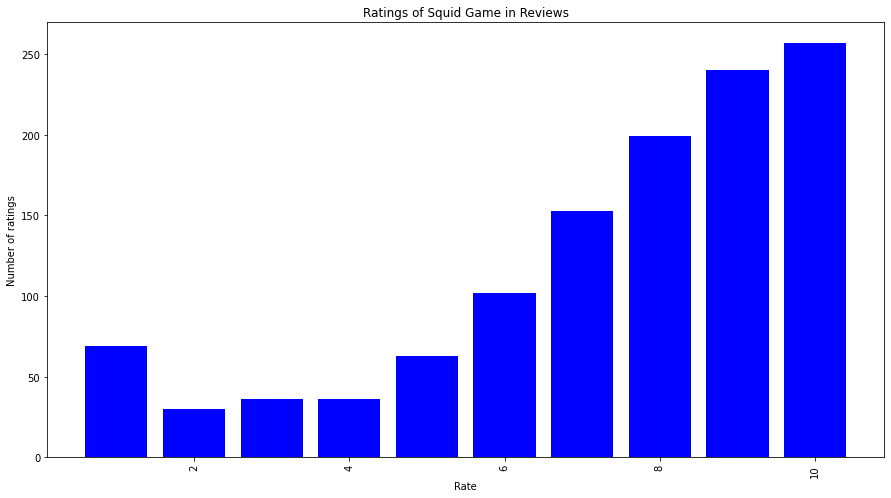

In [ ]:
# Bar graph of review ratings


df = pd.DataFrame(reviews)
  
categories = list(df["Review Rating"])

frequencies = {}
for item in categories:
    if item in frequencies:
        frequencies[item] += 1
    else:
        frequencies[item] = 1
  
X = list(frequencies.keys())
Y = list(frequencies.values())

# Increase the width
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

# Plot the data using bar() method
plt.bar(X, Y, color='b')
plt.title("Ratings of Squid Game in Reviews")
plt.xlabel("Rate")
plt.ylabel("Number of ratings")



  
# Show the plot
plt.show()

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

# Additional words to remove
stopword.add('squid')
stopword.add('watch')
stopword.add('game')
stopword.add('games')
stopword.add('im')
stopword.add('episode')
stopword.add('finish')
stopword.add('peopl')
stopword.add('show')
stopword.add('seri')

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
reviews["Review_body"] = reviews["Review_body"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


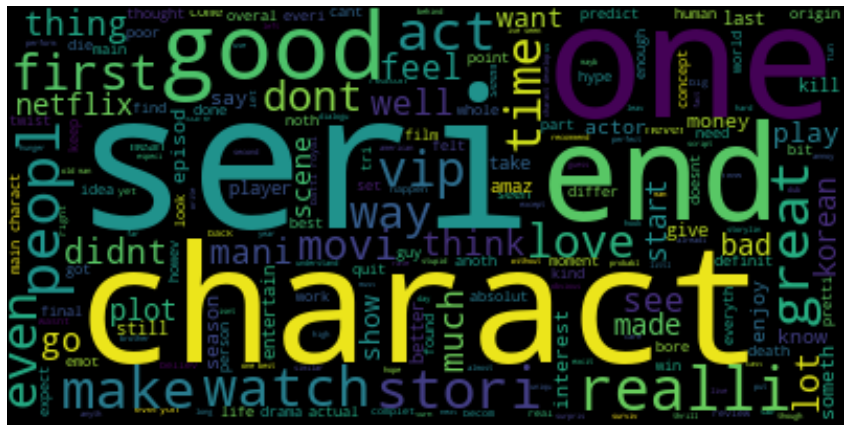

In [ ]:
text = " ".join(i for i in reviews.Review_body)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# need to get rid of last 3 sentences in the Review_body

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
reviews["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in reviews["Review_body"]]
reviews["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in reviews["Review_body"]]
reviews["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in reviews["Review_body"]]
reviews = reviews[["Review_body", "Positive", "Negative", "Neutral"]]
print(reviews.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                         Review_body  Positive  Negative  \
0  finish korean tv that becom global smash hit n...     0.201     0.209   
1  well multipl actual even may find  accur may l...     0.292     0.000   
2  runaway hit south korea centr seong gihun heav...     0.272     0.072   
3  went know absolut noth korean seri yet found a...     0.162     0.126   
4  honest dont know wtf main charact need go room...     0.359     0.000   

   Neutral  
0    0.590  
1    0.708  
2    0.656  
3    0.712  
4    0.641  


In [ ]:
x = sum(reviews["Positive"])
y = sum(reviews["Negative"])
z = sum(reviews["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral


In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  298.41499999999985
Negative:  141.38700000000003
Neutral:  745.180999999999


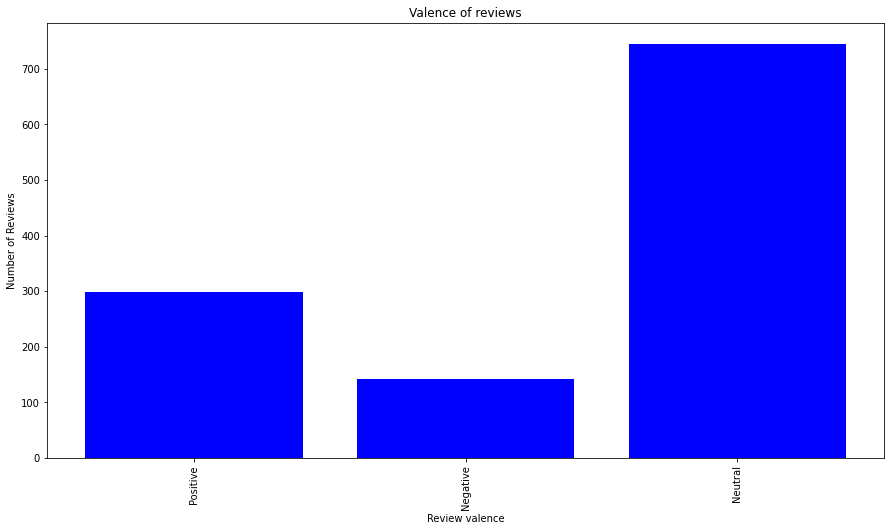

In [ ]:
# Reviews bar graph valence

df = pd.DataFrame(reviews)
  
categories = ["Positive", "Negative", "Neutral"]

frequencies = [x, y, z]

  
X = list(categories)
Y = list(frequencies)

# Increase the width
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

# Plot the data using bar() method
plt.bar(X, Y, color='b')
plt.title("Valence of reviews")
plt.xlabel("Review valence")
plt.ylabel("Number of Reviews")



  
# Show the plot
plt.show()

In [ ]:
# Tweets word cloud
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

# Additional words to remove
stopword.add('squid')
stopword.add('watch')
stopword.add('game')
stopword.add('games')
stopword.add('im')
stopword.add('episode')
stopword.add('peopl')
stopword.add('show')



def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
tweets["Tweet"] = tweets["Tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


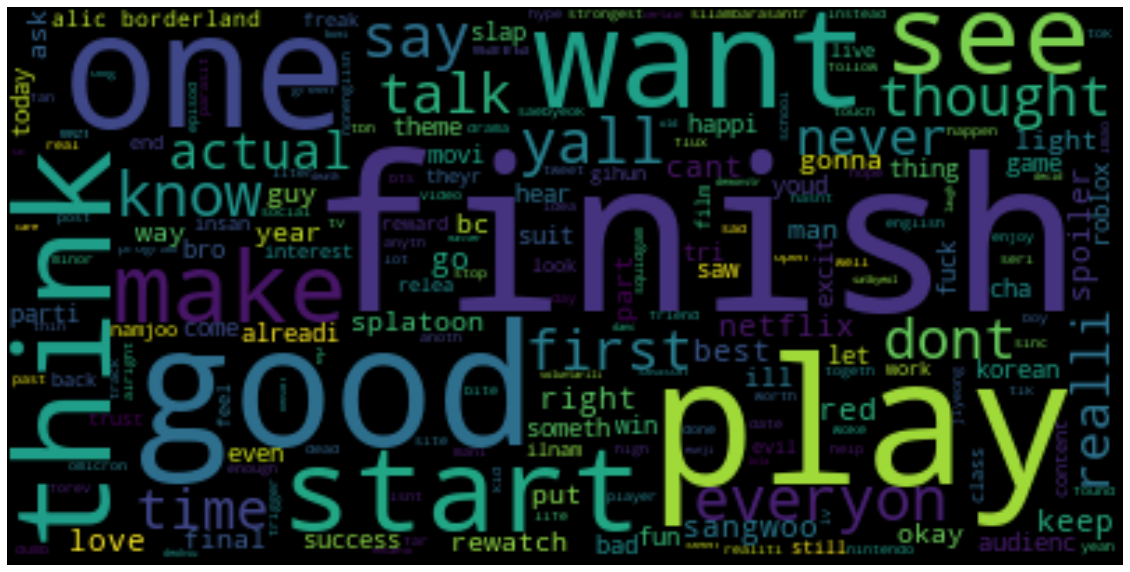

In [ ]:
text = " ".join(i for i in tweets.Tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Sentiment analysis for tweets

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

tweets["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets["Tweet"]]
tweets["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweets["Tweet"]]
tweets["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweets["Tweet"]]
tweets = tweets[["Tweet", "Positive", "Negative", "Neutral"]]
print(tweets.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                               Tweet  Positive  Negative  \
0  feel like we'r part voluntarili decid come bac...     0.412     0.000   
1                                 lola satbyeol danc     0.000     0.000   
2  eunji gihun bomi deoksu namjoo ilnam still lau...     0.310     0.000   
3                watch encanto never trust old peopl     0.000     0.351   
4  success releas year realli demonstr matter fun...     0.598     0.000   

   Neutral  
0    0.588  
1    1.000  
2    0.690  
3    0.649  
4    0.402  


In [ ]:
x = sum(tweets["Positive"])
y = sum(tweets["Negative"])
z = sum(tweets["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x, y, z)

print(x)
print(y)
print(z)

Neutral
21.753
12.682000000000002
80.56700000000004


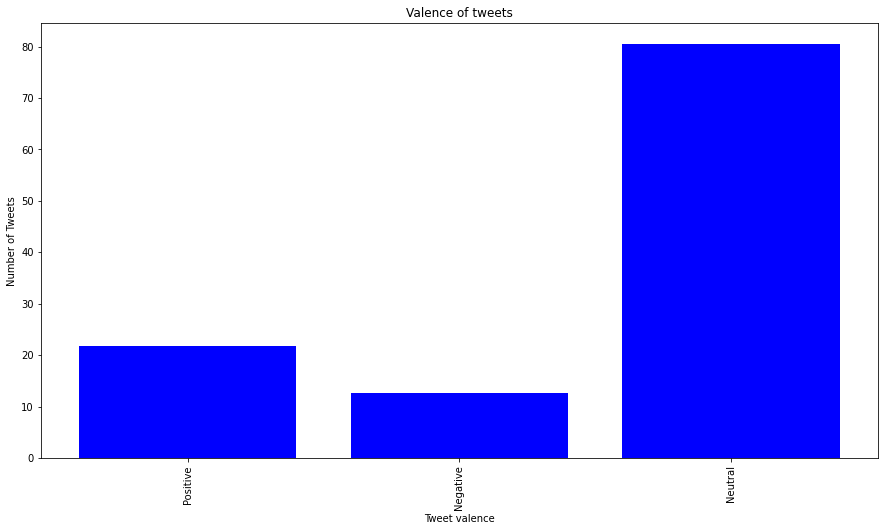

In [ ]:
# Tweets bar graph valence

df = pd.DataFrame(tweets)
  
categories = ["Positive", "Negative", "Neutral"]

frequencies = [x, y, z]

  
X = list(categories)
Y = list(frequencies)

# Increase the width
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

# Plot the data using bar() method
plt.bar(X, Y, color='b')
plt.title("Valence of tweets")
plt.xlabel("Tweet valence")
plt.ylabel("Number of Tweets")



  
# Show the plot
plt.show()

# Interpretations and conclusions

The results of the word clouds were interesting as assumed the critics reviews would be more objective and technical. However, the common words were more subjective and personal, which would be an interesting area to further dig deeper into. 

# Future directions

Some next steps would be analyzing the sentiment towards the polarizing characters of the show. Also, it would be interesting to collect data on other platforms, such as Instagram and TikTok, where people are less concerned about spoilers.